In [1]:
import os
from pandas import read_csv, DataFrame
import numpy as np
import pandas as pd
import pyedra
import matplotlib.pyplot as plt
import seaborn as sn

path = os.getcwd()

In [2]:
df_Gaia = read_csv(path+"/Datos/Jupiter_trojans_Gaia.csv")
df_GaiaDR2 = read_csv(path+"/Datos_Gaia/Gaia_DR2_trojans.csv")
df_GaiaDR3 = read_csv(path+"/Datos_Gaia/Gaia_DR3_trojans.csv")

### Histograma de magnitudes

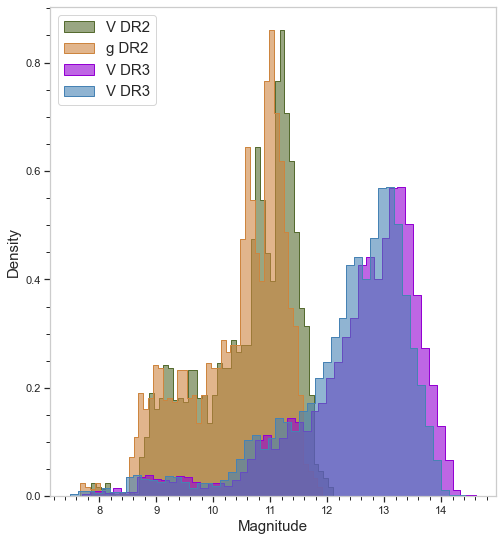

In [25]:
sn.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8,9))
g=sn.histplot(data=df_GaiaDR2, x="V", bins=50, 
             color='darkolivegreen', alpha=0.6, 
             element='step',stat="density", common_norm=False, label='V DR2')
sn.histplot(data=df_GaiaDR2, x="gaia_mag_red", bins=50, 
             color='peru', alpha=0.6,  
             element='step',stat="density", common_norm=False, label='g DR2')

sn.histplot(data=df_GaiaDR3, x="V", bins=50, 
             color='darkviolet', alpha=0.6,  
             element='step',stat="density", common_norm=False, label='V DR3')

sn.histplot(data=df_GaiaDR3, x="gaia_mag_red", bins=50, 
             color='steelblue', alpha=0.6,  
             element='step',stat="density", common_norm=False, label='V DR3')


g.set_xlabel("Magnitude", fontsize = 15)
g.set_ylabel("Density", fontsize = 15)
plt.legend(loc='upper left', fontsize=15)
plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)


#### L4 y L5

In [54]:
L4_L5 = read_csv(path+"/Datos/L4-L5-Jup_trojans.csv")

L4 = L4_L5.loc[L4_L5['Ln'] == 'L4']
L4.drop(L4[L4.Designati.isnull()].index, inplace = True)
L4 = L4.loc[:,'Designati'].to_numpy().astype('int')

L5 = L4_L5.loc[L4_L5['Ln'] == 'L5']
L5.drop(L5[L5.Designati.isnull()].index, inplace = True)
L5 = L5.loc[:,'Designati'].to_numpy().astype('int')

# DR2
df_L4_DR2 = df_GaiaDR2
df_L5_DR2 = df_GaiaDR2
for i in range(len(df_GaiaDR2)):
    if df_L4_DR2.loc[i,'Number'] not in L4:
        df_L4_DR2 = df_L4_DR2.drop([i], axis=0)
    if df_L5_DR2.loc[i,'Number'] not in L5:
        df_L5_DR2 = df_L5_DR2.drop([i], axis=0)
        
print('--Troyanos de Júpiter DR2--')
print('\nL4\nNº asteroides:', len(df_L4_DR2.drop_duplicates(subset=['Number'], keep="last")))
print('Nº observaciones:', len(df_L4_DR2))
print('\nL5\nNº asteroides:', len(df_L5_DR2.drop_duplicates(subset=['Number'], keep="last")))
print('Nº observaciones:', len(df_L5_DR2))


# DR3
df_L4_DR3 = df_GaiaDR3
df_L5_DR3 = df_GaiaDR3
for i in range(len(df_GaiaDR3)):
    if df_L4_DR3.loc[i,'Number'] not in L4:
        df_L4_DR3 = df_L4_DR3.drop([i], axis=0)
    if df_L5_DR3.loc[i,'Number'] not in L5:
        df_L5_DR3 = df_L5_DR3.drop([i], axis=0)
        
print('\n\n--Troyanos de Júpiter DR3--')
print('\nL4\nNº asteroides:', len(df_L4_DR3.drop_duplicates(subset=['Number'], keep="last")))
print('Nº observaciones:', len(df_L4_DR3))
print('\nL5\nNº asteroides:', len(df_L5_DR3.drop_duplicates(subset=['Number'], keep="last")))
print('Nº observaciones:', len(df_L5_DR3))


--Troyanos de Júpiter DR2--

L4
Nº asteroides: 105
Nº observaciones: 1686

L5
Nº asteroides: 78
Nº observaciones: 1096


--Troyanos de Júpiter DR3--

L4
Nº asteroides: 145
Nº observaciones: 2744

L5
Nº asteroides: 102
Nº observaciones: 2026


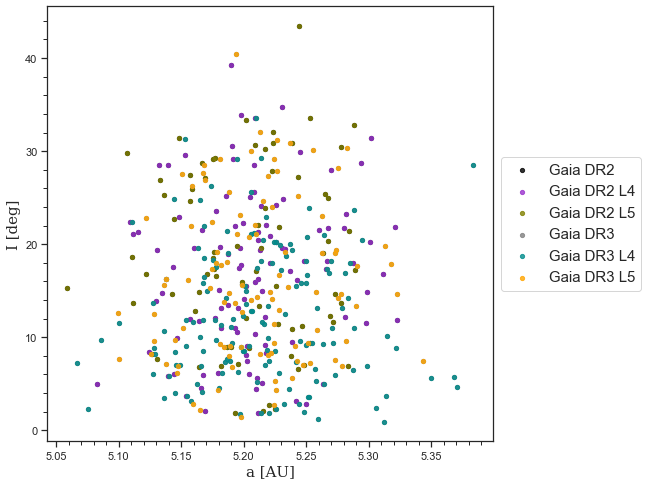

In [55]:
sn.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(8,8))

# DR2
ax.scatter(df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_GaiaDR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.8,color='black', label='Gaia DR2')
ax.scatter(df_L4_DR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_L4_DR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.8,color='darkorchid', label='Gaia DR2 L4')
ax.scatter(df_L5_DR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_L5_DR2.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.8,color='olive', label='Gaia DR2 L5')

# DR3
ax.scatter(df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_GaiaDR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.8,color='grey', label='Gaia DR3')
ax.scatter(df_L4_DR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_L4_DR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.8,color='darkcyan', label='Gaia DR3 L4')
ax.scatter(df_L5_DR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'a_orb'],
           df_L5_DR3.drop_duplicates(subset=['Number'], keep="last").loc[:,'i_orb'], 
           s=18,alpha=0.8,color='orange', label='Gaia DR3 L5')


plt.xlabel(r'a [AU]', fontsize=15,fontfamily='serif') 
plt.ylabel(r'I [deg]', fontsize=15,fontfamily='serif')
plt.minorticks_on()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)


## Asteroides comunes

### Asteroides y observaciones

Se determina el id de los asteroides comunes en ambas bases de datos.

Creo DF para los asteroides comunes en general (df_Gaia_coinc) y en particular de cada catálogo (df_GaiaDR2_coinc y df_GaiaDR3_coinc)

In [3]:
## Hallar id de los coincidentes
df_coinc = pd.merge(df_GaiaDR2.loc[:,'Number'], df_GaiaDR3.loc[:,'Number'], on=['Number'], how='inner')
df_coinc = df_coinc.drop_duplicates()
ast_coinc = df_coinc.to_numpy().reshape(1,len(df_coinc))

## DFs con los asteroides comunes
df_Gaia_coinc = df_Gaia[df_Gaia['id'].isin(ast_coinc[0,:])]
df_GaiaDR2_coinc = df_GaiaDR2[df_GaiaDR2['Number'].isin(ast_coinc[0,:])]
df_GaiaDR2_coinc.rename(columns={'Number': 'id','Phase':'alpha','V':'v'}, inplace=True)
df_GaiaDR3_coinc = df_GaiaDR3[df_GaiaDR3['Number'].isin(ast_coinc[0,:])]
df_GaiaDR3_coinc.rename(columns={'Number': 'id','Phase':'alpha','V':'v'}, inplace=True)

print('Nº asteroides comunes de Gaia:', len(df_Gaia_coinc.drop_duplicates(subset=['id'], keep="last")))
print('Nº observaciones de Gaia:', len(df_Gaia_coinc))
print('\nNº observaciones de Gaia DR2:', len(df_GaiaDR2_coinc))
print('Nº observaciones de Gaia DR3:', len(df_GaiaDR3_coinc))
print('\nId asteroides comunes:\n', ast_coinc)



Nº asteroides comunes de Gaia: 31
Nº observaciones de Gaia: 1101

Nº observaciones de Gaia DR2: 420
Nº observaciones de Gaia DR3: 681

Id asteroides comunes:
 [[  617   624   884  1404  1437  2357  2797  3317  3564  4057  4792  4832
   5012  5144  5244  5264  5284  5652  6997  7152  7352  9857 11252 11552
  12052 12444 15977 17492 20424 24244 39264]]


C:\Users\saruk\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
df_Gaia_coinc.to_csv(path+"/Datos/Jupiter_trojans_Gaia_matching.csv",index=False)



### Código Pyedra

Se implementa el código en los distintos df para determinas H y G a partir de la magnitud V y la fase, añadiendo errores porcentuales y eliminando observaciones con errores de más del 30% o NaN

##### DR2 + DR3

In [17]:
# Código Pyedra
HG = pyedra.HG_fit(df_Gaia_coinc, idc="id", alphac="alpha", magc="v")


## Rellenar tabla original con H, G y V ajustados

# Añadir errores porcentuales
HG.loc[:,'%error_H'] = np.abs(HG.loc[:,'error_H']/HG.loc[:,'H']*100)
HG.loc[:,'%error_G'] = np.abs(HG.loc[:,'error_G']/HG.loc[:,'G']*100)
display(HG)

# H y G 
HG.rename(columns={'H': 'H_fit','G':'G_fit','R':'r'}, inplace=True)
df_Gaia_coinc_HG = pd.merge(df_Gaia_coinc, HG, on=('id'), how='outer')

# V  
V = df_Gaia_coinc_HG.loc[:,'v']
Phase = df_Gaia_coinc_HG.loc[:,'alpha']
H = df_Gaia_coinc_HG.loc[:,'H_fit']
G = df_Gaia_coinc_HG.loc[:,'G_fit']

def V_fit(alpha, H, G):                                        
    x = alpha * np.pi / 180
    y = H - 2.5 * np.log10(
        (1 - G) * np.exp(-3.33 * np.tan(x / 2) ** 0.63)
        + G * np.exp(-1.87 * np.tan(x / 2) ** 1.22))
    return y
df_Gaia_coinc_HG['V_fit'] = V_fit(Phase, H, G)

display(df_Gaia_coinc_HG)


# Eliminar observaciones
df_Gaia_coinc_HG.drop(df_Gaia_coinc_HG[df_Gaia_coinc_HG.loc[:,'%error_H'] > 30].index, inplace = True)
df_Gaia_coinc_HG.drop(df_Gaia_coinc_HG[df_Gaia_coinc_HG.loc[:,'%error_H'].isna()].index, inplace = True)

display(df_Gaia_coinc_HG)

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)


,id,H,error_H,G,error_G,R,observations,%error_H,%error_G
0,617,8.350499,1.399854,0.319652,0.554309,3.285535e-02,27,16.763722,173.410196
1,624,6.881491,0.552280,-0.448541,0.408941,2.147584e-01,53,8.025588,91.171426
2,884,7.565949,1.036239,-0.810162,1.079135,2.187100e-01,21,13.696087,133.199925
3,1404,9.445026,1.726073,0.235492,0.676190,3.467903e-02,20,18.274938,287.139315
4,1437,14.224205,264.184935,294.275616,71545.868345,1.816082e-02,59,1857.291406,24312.537079
5,2357,8.608242,0.566316,-0.170243,0.301475,2.347211e-01,35,6.578760,177.084943
6,2797,8.618939,0.748941,-0.113246,0.373106,9.402958e-02,55,8.689484,329.464101
7,3317,8.684286,2.513541,0.531578,1.197930,5.237266e-03,35,28.943553,225.353604
8,3564,9.106740,0.337763,-0.228669,0.192232,5.205023e-01,30,3.708939,84.065441
9,4057,10.176464,0.885677,0.106180,0.362698,8.456222e-02,35,8.703189,341.588635


C:\Users\saruk\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,alpha,H,...,v,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,617,2.457079e+06,15.620037,5.211550,0.139705,22.060182,5.154334,4.948120,11.1070,8.23,...,8.772160,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.900337
1,617,2.457111e+06,15.870535,5.211550,0.139705,22.060182,5.188600,5.477953,10.3861,8.23,...,8.787380,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.877640
2,617,2.457111e+06,15.879597,5.211550,0.139705,22.060182,5.188678,5.479101,10.3818,8.23,...,8.795954,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.877503
3,617,2.457130e+06,16.005085,5.211550,0.139705,22.060182,5.208835,5.755933,8.9343,8.23,...,8.805991,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.830222
4,617,2.457293e+06,15.989436,5.211550,0.139705,22.060182,5.375025,5.594499,10.3346,8.23,...,8.783914,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.875999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,39264,2.456886e+06,18.891659,5.250161,0.071971,18.179400,5.514255,6.184782,7.5839,10.87,...,11.427730,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.462600
1097,39264,2.457020e+06,18.932068,5.250161,0.071971,18.179400,5.554236,5.956359,9.0635,10.87,...,11.534169,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.552672
1098,39264,2.456886e+06,18.927018,5.250161,0.071971,18.179400,5.514424,6.190498,7.5312,10.87,...,11.461016,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.459288
1099,39264,2.456886e+06,18.979207,5.250161,0.071971,18.179400,5.514171,6.181910,7.6101,10.87,...,11.516319,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.464243


,id,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,alpha,H,...,v,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,617,2.457079e+06,15.620037,5.211550,0.139705,22.060182,5.154334,4.948120,11.1070,8.23,...,8.772160,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.900337
1,617,2.457111e+06,15.870535,5.211550,0.139705,22.060182,5.188600,5.477953,10.3861,8.23,...,8.787380,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.877640
2,617,2.457111e+06,15.879597,5.211550,0.139705,22.060182,5.188678,5.479101,10.3818,8.23,...,8.795954,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.877503
3,617,2.457130e+06,16.005085,5.211550,0.139705,22.060182,5.208835,5.755933,8.9343,8.23,...,8.805991,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.830222
4,617,2.457293e+06,15.989436,5.211550,0.139705,22.060182,5.375025,5.594499,10.3346,8.23,...,8.783914,8.350499,1.399854,0.319652,0.554309,0.032855,27,16.763722,173.410196,8.875999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,39264,2.456886e+06,18.891659,5.250161,0.071971,18.179400,5.514255,6.184782,7.5839,10.87,...,11.427730,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.462600
1097,39264,2.457020e+06,18.932068,5.250161,0.071971,18.179400,5.554236,5.956359,9.0635,10.87,...,11.534169,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.552672
1098,39264,2.456886e+06,18.927018,5.250161,0.071971,18.179400,5.514424,6.190498,7.5312,10.87,...,11.461016,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.459288
1099,39264,2.456886e+06,18.979207,5.250161,0.071971,18.179400,5.514171,6.181910,7.6101,10.87,...,11.516319,10.724433,0.220712,-0.105535,0.112082,0.697730,29,2.058025,106.204091,11.464243


##### DR2

In [18]:
# Código Pyedra
HG = pyedra.HG_fit(df_GaiaDR2_coinc, idc="id", alphac="alpha", magc="v")

# Errores porcentuales
HG.loc[:,'%error_H'] = np.abs(HG.loc[:,'error_H']/HG.loc[:,'H']*100)
HG.loc[:,'%error_G'] = np.abs(HG.loc[:,'error_G']/HG.loc[:,'G']*100)
display(HG)

# H y G 
HG.rename(columns={'H': 'H_fit','G':'G_fit','R':'r'}, inplace=True)
df_GaiaDR2_coinc_HG = pd.merge(df_GaiaDR2_coinc, HG, on=('id'), how='outer')

# V  
V = df_GaiaDR2_coinc_HG.loc[:,'v']
Phase = df_GaiaDR2_coinc_HG.loc[:,'alpha']
H = df_GaiaDR2_coinc_HG.loc[:,'H_fit']
G = df_GaiaDR2_coinc_HG.loc[:,'G_fit']

def V_fit(alpha, H, G):                                        
    x = alpha * np.pi / 180
    y = H - 2.5 * np.log10(
        (1 - G) * np.exp(-3.33 * np.tan(x / 2) ** 0.63)
        + G * np.exp(-1.87 * np.tan(x / 2) ** 1.22))
    return y
df_GaiaDR2_coinc_HG['V_fit'] = V_fit(Phase, H, G)

display(df_GaiaDR2_coinc_HG)


# Eliminar observaciones
df_GaiaDR2_coinc_HG.drop(df_GaiaDR2_coinc_HG[df_GaiaDR2_coinc_HG.loc[:,'%error_H'] > 30].index, inplace = True)
df_GaiaDR2_coinc_HG.drop(df_GaiaDR2_coinc_HG[df_GaiaDR2_coinc_HG.loc[:,'%error_H'].isna()].index, inplace = True)

display(df_GaiaDR2_coinc_HG)

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)


,id,H,error_H,G,error_G,R,observations,%error_H,%error_G
0,617,10.458269,7.338948,9.612645,63.540574,0.100391,9,70.173641,661.010290
1,624,6.813659,0.723968,-0.509425,0.570232,0.262248,26,10.625243,111.936248
2,884,8.961598,2.734229,0.283963,1.076602,0.036180,9,30.510511,379.134138
3,1404,9.144040,0.909366,-0.145913,0.479476,0.322789,10,9.944904,328.603543
4,1437,NaN,-4.695750,-7.060807,31.628787,0.112684,26,NaN,447.948599
5,2357,9.028463,0.652129,0.274864,0.253110,0.316209,12,7.223038,92.085607
6,2797,8.647581,0.508563,-0.123315,0.255969,0.354335,24,5.880988,207.572576
7,3317,8.186572,1.133210,-0.146285,0.593357,0.213525,11,13.842307,405.617230
8,3564,9.046032,0.430008,-0.278458,0.259502,0.601150,15,4.753559,93.192291
9,4057,10.229423,0.843569,0.144379,0.339980,0.248085,12,8.246499,235.477263


C:\Users\saruk\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,alpha,H,...,v,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,617,2.457079e+06,15.620037,5.211550,0.139705,22.060182,5.154334,4.948120,11.1070,8.18,...,8.772160,10.458269,7.338948,9.612645,63.540574,0.100391,9,70.173641,661.010290,8.796436
1,617,2.457111e+06,15.870535,5.211550,0.139705,22.060182,5.188600,5.477953,10.3861,8.18,...,8.787380,10.458269,7.338948,9.612645,63.540574,0.100391,9,70.173641,661.010290,8.809498
2,617,2.457111e+06,15.879597,5.211550,0.139705,22.060182,5.188678,5.479101,10.3818,8.18,...,8.795954,10.458269,7.338948,9.612645,63.540574,0.100391,9,70.173641,661.010290,8.809582
3,617,2.457130e+06,16.005085,5.211550,0.139705,22.060182,5.208835,5.755933,8.9343,8.18,...,8.805991,10.458269,7.338948,9.612645,63.540574,0.100391,9,70.173641,661.010290,8.842617
4,617,2.457293e+06,15.989436,5.211550,0.139705,22.060182,5.375025,5.594499,10.3346,8.18,...,8.783914,10.458269,7.338948,9.612645,63.540574,0.100391,9,70.173641,661.010290,8.810510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,39264,2.457042e+06,18.972682,5.247983,0.071674,18.181174,5.560016,5.608489,10.2045,10.87,...,11.688259,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.638708
416,39264,2.457236e+06,18.991748,5.247983,0.071674,18.181174,5.595960,5.658686,10.4331,10.87,...,11.673984,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.653419
417,39264,2.457260e+06,18.976473,5.247983,0.071674,18.181174,5.598774,6.022789,9.1688,10.87,...,11.522207,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.570809
418,39264,2.457399e+06,18.946430,5.247983,0.071674,18.181174,5.607369,6.175373,7.9443,10.87,...,11.434505,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.487508


,id,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,alpha,H,...,v,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
9,624,2.456886e+06,15.281108,5.266847,0.022556,18.154928,5.141309,5.798567,8.2316,7.45,...,8.094323,6.813659,0.723968,-0.509425,0.570232,0.262248,26,10.625243,111.936248,8.024266
10,624,2.456886e+06,15.053176,5.266847,0.022556,18.154928,5.141316,5.799374,8.2238,7.45,...,7.866086,6.813659,0.723968,-0.509425,0.570232,0.262248,26,10.625243,111.936248,8.023396
11,624,2.456886e+06,15.307549,5.266847,0.022556,18.154928,5.141341,5.802093,8.1972,7.45,...,8.119430,6.813659,0.723968,-0.509425,0.570232,0.262248,26,10.625243,111.936248,8.020428
12,624,2.456886e+06,15.044172,5.266847,0.022556,18.154928,5.141359,5.804003,8.1784,7.45,...,7.855331,6.813659,0.723968,-0.509425,0.570232,0.262248,26,10.625243,111.936248,8.018329
13,624,2.456886e+06,15.276040,5.266847,0.022556,18.154928,5.141367,5.804804,8.1705,7.45,...,8.086897,6.813659,0.723968,-0.509425,0.570232,0.262248,26,10.625243,111.936248,8.017448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,39264,2.457042e+06,18.972682,5.247983,0.071674,18.181174,5.560016,5.608489,10.2045,10.87,...,11.688259,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.638708
416,39264,2.457236e+06,18.991748,5.247983,0.071674,18.181174,5.595960,5.658686,10.4331,10.87,...,11.673984,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.653419
417,39264,2.457260e+06,18.976473,5.247983,0.071674,18.181174,5.598774,6.022789,9.1688,10.87,...,11.522207,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.570809
418,39264,2.457399e+06,18.946430,5.247983,0.071674,18.181174,5.607369,6.175373,7.9443,10.87,...,11.434505,10.650683,0.274596,-0.191232,0.154257,0.831468,11,2.578199,80.664698,11.487508


##### DR3

In [19]:
# Código Pyedra
HG = pyedra.HG_fit(df_GaiaDR3_coinc, idc="id", alphac="alpha", magc="v")

# Errores porcentuales
HG.loc[:,'%error_H'] = np.abs(HG.loc[:,'error_H']/HG.loc[:,'H']*100)
HG.loc[:,'%error_G'] = np.abs(HG.loc[:,'error_G']/HG.loc[:,'G']*100)
display(HG)

# H y G 
HG.rename(columns={'H': 'H_fit','G':'G_fit','R':'r'}, inplace=True)
df_GaiaDR3_coinc_HG = pd.merge(df_GaiaDR3_coinc, HG, on=('id'), how='outer')

# V  
V = df_GaiaDR3_coinc_HG.loc[:,'v']
Phase = df_GaiaDR3_coinc_HG.loc[:,'alpha']
H = df_GaiaDR3_coinc_HG.loc[:,'H_fit']
G = df_GaiaDR3_coinc_HG.loc[:,'G_fit']

def V_fit(alpha, H, G):                                        
    x = alpha * np.pi / 180
    y = H - 2.5 * np.log10(
        (1 - G) * np.exp(-3.33 * np.tan(x / 2) ** 0.63)
        + G * np.exp(-1.87 * np.tan(x / 2) ** 1.22))
    return y
df_GaiaDR3_coinc_HG['V_fit'] = V_fit(Phase, H, G)

display(df_GaiaDR3_coinc_HG)


# Eliminar observaciones
df_GaiaDR3_coinc_HG.drop(df_GaiaDR3_coinc_HG[df_GaiaDR3_coinc_HG.loc[:,'%error_H'] > 30].index, inplace = True)
df_GaiaDR3_coinc_HG.drop(df_GaiaDR3_coinc_HG[df_GaiaDR3_coinc_HG.loc[:,'%error_H'].isna()].index, inplace = True)

display(df_GaiaDR3_coinc_HG)

c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)
c:\users\saruk\pyedra-master\pyedra\hg_model.py:243: RuntimeWarning: invalid value encountered in log10
  H = -2.5 * np.log10(a + b)


,id,H,error_H,G,error_G,R,observations,%error_H,%error_G
0,617,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666
1,624,6.994783,0.911512,-0.345470,0.604017,0.157534,27,13.031308,174.839378
2,884,7.075191,1.068053,-0.967898,1.258257,0.361149,12,15.095747,129.998941
3,1404,9.701951,4.001810,0.666753,2.228276,0.006246,10,41.247471,334.197901
4,1437,10.121099,10.091383,5.706464,50.966308,0.004157,33,99.706401,893.132853
5,2357,8.506472,0.717348,-0.251219,0.420899,0.245738,23,8.432972,167.542767
6,2797,8.629205,1.261323,-0.073478,0.601004,0.060356,31,14.616904,817.937890
7,3317,8.923516,4.190717,0.996096,3.362402,0.000289,24,46.962618,337.557982
8,3564,9.175972,0.567780,-0.168067,0.300695,0.439300,15,6.187680,178.913593
9,4057,10.090592,1.234343,0.017866,0.541528,0.075568,23,12.232612,3031.048283


C:\Users\saruk\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,id,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,alpha,H,...,v,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,617,2.457738e+06,16.154785,5.209408,0.139894,22.062353,5.746867,5.238300,8.9410,8.18,...,8.961804,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.848420
1,617,2.457752e+06,16.072846,5.209408,0.139894,22.062353,5.755728,5.081564,7.7455,8.18,...,8.942485,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.765200
2,617,2.457111e+06,16.422122,5.209408,0.139894,22.062353,5.188678,5.479101,10.3818,8.18,...,9.353419,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.944511
3,617,2.457293e+06,16.223990,5.209408,0.139894,22.062353,5.375025,5.594499,10.3346,8.18,...,9.033408,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.941426
4,617,2.457324e+06,15.986973,5.209408,0.139894,22.062353,5.405486,5.160189,10.5725,8.18,...,8.959598,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.956934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,39264,2.456886e+06,18.891659,5.250161,0.071971,18.179400,5.514255,6.184782,7.5839,10.87,...,11.427730,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.464041
677,39264,2.457020e+06,18.932068,5.250161,0.071971,18.179400,5.554236,5.956359,9.0635,10.87,...,11.534169,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.545999
678,39264,2.456886e+06,18.927018,5.250161,0.071971,18.179400,5.514424,6.190498,7.5312,10.87,...,11.461016,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.461023
679,39264,2.456886e+06,18.979207,5.250161,0.071971,18.179400,5.514171,6.181910,7.6101,10.87,...,11.516319,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.465540


,id,jd,gaia_mag,a_orb,e_orb,i_orb,Delta,R,alpha,H,...,v,H_fit,error_H,G_fit,error_G,r,observations,%error_H,%error_G,V_fit
0,617,2.457738e+06,16.154785,5.209408,0.139894,22.062353,5.746867,5.238300,8.9410,8.18,...,8.961804,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.848420
1,617,2.457752e+06,16.072846,5.209408,0.139894,22.062353,5.755728,5.081564,7.7455,8.18,...,8.942485,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.765200
2,617,2.457111e+06,16.422122,5.209408,0.139894,22.062353,5.188678,5.479101,10.3818,8.18,...,9.353419,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.944511
3,617,2.457293e+06,16.223990,5.209408,0.139894,22.062353,5.375025,5.594499,10.3346,8.18,...,9.033408,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.941426
4,617,2.457324e+06,15.986973,5.209408,0.139894,22.062353,5.405486,5.160189,10.5725,8.18,...,8.959598,7.932420,1.325760,-0.202085,0.740541,0.103917,18,16.713189,366.450666,8.956934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,39264,2.456886e+06,18.891659,5.250161,0.071971,18.179400,5.514255,6.184782,7.5839,10.87,...,11.427730,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.464041
677,39264,2.457020e+06,18.932068,5.250161,0.071971,18.179400,5.554236,5.956359,9.0635,10.87,...,11.534169,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.545999
678,39264,2.456886e+06,18.927018,5.250161,0.071971,18.179400,5.514424,6.190498,7.5312,10.87,...,11.461016,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.461023
679,39264,2.456886e+06,18.979207,5.250161,0.071971,18.179400,5.514171,6.181910,7.6101,10.87,...,11.516319,10.781629,0.337373,-0.036471,0.158520,0.605235,18,3.129151,434.645642,11.465540


#### Comparativas H y G

De bases DR2 y DR3 calculado con Pyedra

In [20]:
df_coinc = pd.merge(df_GaiaDR2_coinc_HG.loc[:,'id'], df_GaiaDR3_coinc_HG.loc[:,'id'], on=['id'], how='inner')
df_coinc = df_coinc.drop_duplicates()
ast_coinc = df_coinc.to_numpy().reshape(1,len(df_coinc))

df_GaiaDR2_coinc_ = df_GaiaDR2_coinc_HG[df_GaiaDR2_coinc_HG['id'].isin(ast_coinc[0,:])]
df_GaiaDR3_coinc_ = df_GaiaDR3_coinc_HG[df_GaiaDR3_coinc_HG['id'].isin(ast_coinc[0,:])]

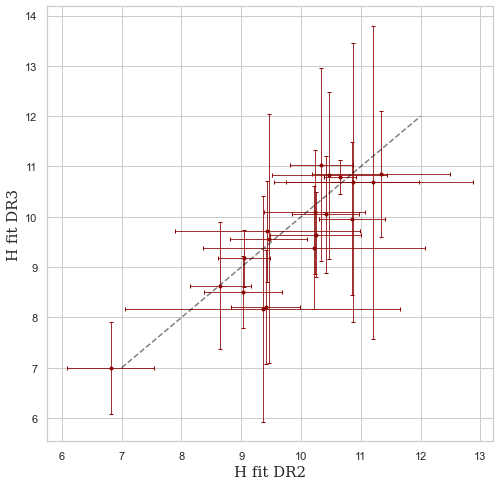

In [33]:
sn.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(8,8))

H_DR2 = df_GaiaDR2_coinc_.drop_duplicates(subset=['id'], keep="last").loc[:,'H_fit']
H_DR2_err = df_GaiaDR2_coinc_.drop_duplicates(subset=['id'], keep="last").loc[:,'error_H']
H_DR3 =  df_GaiaDR3_coinc_.drop_duplicates(subset=['id'], keep="last").loc[:,'H_fit']
H_DR3_err = df_GaiaDR3_coinc_.drop_duplicates(subset=['id'], keep="last").loc[:,'error_H']

plt.errorbar(H_DR2,H_DR3, xerr=H_DR2_err, yerr=H_DR3_err, fmt='o',
             capsize=2,elinewidth=0.8,markersize=3,color='darkred')
#plt.scatter(H_DR2,H_DR3, s=8,color='darkred')

plt.xlabel(r"H fit DR2", fontsize=15,fontfamily='serif')
plt.ylabel( r"H fit DR3", fontsize=15,fontfamily='serif')



# Línea y=x
x = np.linspace(7,12)
y = x
plt.plot(x,y, '--', color = 'black', alpha=0.5)



### Phase curve

##### DR2 + DR3 

Curvas de fase con V determinado a partir de los H y G calculados al implementar el código Pyedra en el catálogo de todas las observaciones de asteroides comunes

In [63]:
from statistics import mode
x=np.array(df_Gaia_coinc_HG.loc[:,'id'])
print(mode(x))

most_repeated = df_Gaia_coinc_HG.groupby(df_Gaia_coinc_HG.id).size().sort_values(ascending=False)
print(most_repeated)

2797
id
2797     55
624      53
17492    49
5652     44
9857     42
4832     41
6997     41
5284     40
5264     40
15977    38
4057     35
2357     35
3317     35
12444    34
20424    34
4792     32
7152     30
3564     30
24244    29
5012     29
39264    29
7352     28
617      27
12052    27
5244     25
884      21
1404     20
5144     19
dtype: int64


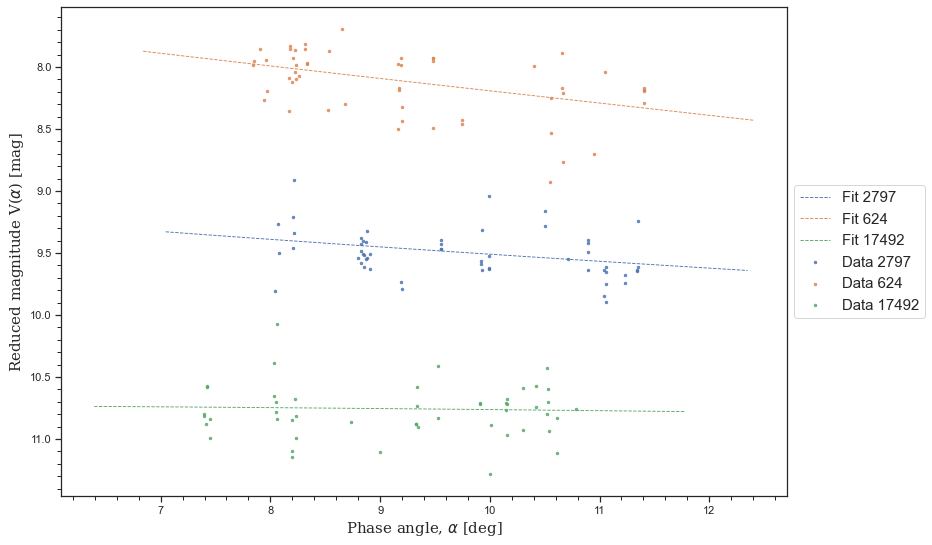

In [66]:
sn.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(13,9))

# Defino un array con el id de los asteroides y los divido en dataframes
#number = np.array(df_Gaia_coinc_HG.loc[:,'id'].drop_duplicates())
number = [2797, 624, 17492]
groups = df_Gaia_coinc_HG.groupby(df_Gaia_coinc_HG.id)


# Plot individual para el dataframe de cada asteroide
for i in number:
    ast =  groups.get_group(i)
    ax.scatter(ast.loc[:,'alpha'], ast.loc[:,'v'], s=6,alpha=0.8, label='Data %d' %(i))
    
    alp = np.linspace(ast['alpha'].min()-1, ast['alpha'].max()+1,100)  # Array de alpha para hacer el plot del ajuste, tantos como quiera
    H_fit = ast['H_fit'].values[0]
    G_fit = ast['G_fit'].values[0]
    H_ast = np.full(len(alp), H_fit)
    G_ast = np.full(len(alp), G_fit)

    v_fit = V_fit(alp,H_ast,G_ast)

    ax.plot(alp, v_fit, linewidth=0.9, linestyle="dashed", alpha=1, label='Fit %d' %(i))

plt.xlabel(r"Phase angle, $\alpha$ [deg]", fontsize=15,fontfamily='serif')
plt.ylabel( r"Reduced magnitude V($\alpha$) [mag]", fontsize=15,fontfamily='serif')
plt.gca().invert_yaxis()
plt.grid(False)
plt.minorticks_on()
ax.tick_params(which='both', bottom=True, left=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)


##### DR2 y DR3 

Curvas de fase con los datos calculados por separado

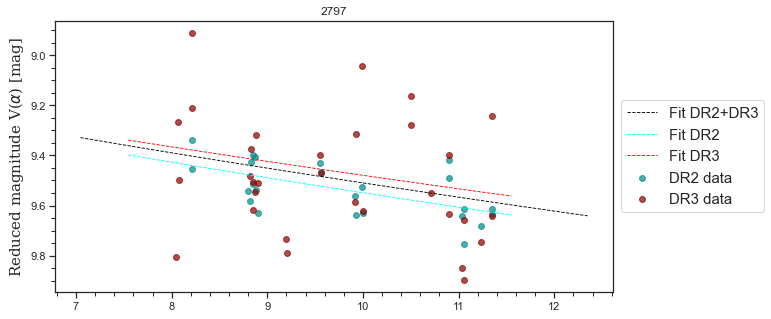

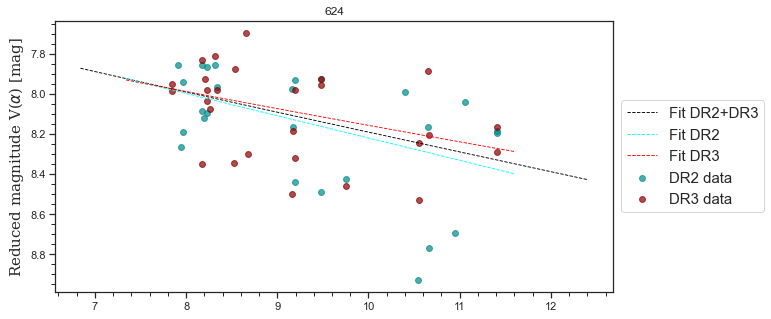

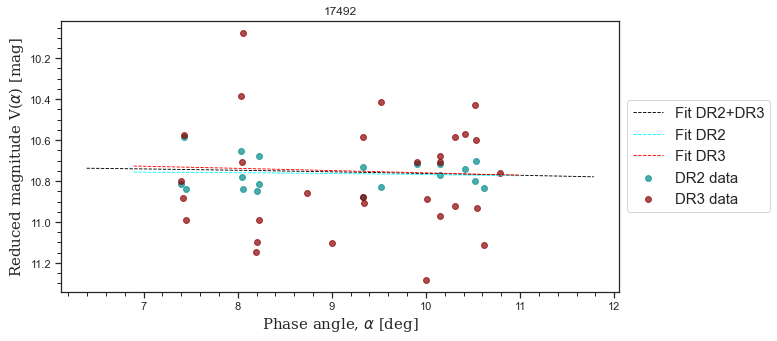

In [81]:
sn.set_theme(style="ticks")

number = [2797, 624, 17492]

groups = df_Gaia_coinc_HG.groupby(df_Gaia_coinc_HG.id)
groupsDR2 = df_GaiaDR2_coinc_HG.groupby(df_GaiaDR2_coinc_HG.id)
groupsDR3 = df_GaiaDR3_coinc_HG.groupby(df_GaiaDR3_coinc_HG.id)


for i in number:
    ast =  groups.get_group(i)
    astDR2 =  groupsDR2.get_group(i)
    astDR3 =  groupsDR3.get_group(i)
    
    fig, ax = plt.subplots(figsize=(10,5))
    
    # Scatter de los datos
    ax.scatter(astDR2.loc[:,'alpha'], astDR2.loc[:,'v'], s=35,alpha=0.7,  color='darkcyan')
    ax.scatter(astDR3.loc[:,'alpha'], astDR3.loc[:,'v'], s=35,alpha=0.7, color='darkred')
    
    # Ajuste DR2+DR3
    alp = np.linspace(ast['alpha'].min()-1, ast['alpha'].max()+1,100)  # Array de alpha para hacer el plot del ajuste, tantos como quiera
    H_fit = ast['H_fit'].values[0]
    G_fit = ast['G_fit'].values[0]
    H_ast = np.full(len(alp), H_fit)
    G_ast = np.full(len(alp), G_fit)
    v_fit = V_fit(alp,H_ast,G_ast)
    ax.plot(alp, v_fit, linewidth=0.9, linestyle="dashed", color='black', alpha=1, )
    
    # Ajuste DR2
    alp = np.linspace(ast['alpha'].min()-0.5, ast['alpha'].max()+0.2,100)  
    H_fit = astDR2['H_fit'].values[0]
    G_fit = astDR2['G_fit'].values[0]
    H_ast = np.full(len(alp), H_fit)
    G_ast = np.full(len(alp), G_fit)
    v_fit = V_fit(alp,H_ast,G_ast)
    ax.plot(alp, v_fit, linewidth=0.9, linestyle="dashed", color='cyan', alpha=1)
    
    # Ajuste DR3
    alp = np.linspace(ast['alpha'].min()-0.5, ast['alpha'].max()+0.2,100)  # Array de alpha para hacer el plot del ajuste, tantos como quiera
    H_fit = astDR3['H_fit'].values[0]
    G_fit = astDR3['G_fit'].values[0]
    H_ast = np.full(len(alp), H_fit)
    G_ast = np.full(len(alp), G_fit)
    v_fit = V_fit(alp,H_ast,G_ast)
    ax.plot(alp, v_fit, linewidth=0.9, linestyle="dashed", color='red', alpha=1)
    
    plt.title(i)
    plt.ylabel( r"Reduced magnitude V($\alpha$) [mag]", fontsize=15,fontfamily='serif')
    plt.gca().invert_yaxis()
    plt.grid(False)
    plt.minorticks_on()
    plt.legend( ['Fit DR2+DR3','Fit DR2','Fit DR3','DR2 data','DR3 data'],loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)


plt.xlabel(r"Phase angle, $\alpha$ [deg]", fontsize=15,fontfamily='serif')
ax.tick_params(which='both', bottom=True, left=True)
